In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
df = pd.read_csv('covid19.csv')

# Praproses data
df['New_deaths'] = df['New_deaths'].fillna(0)
df['Cumulative_cases'] = df['Cumulative_cases'].fillna(0)

# Encoding kolom 'Country'
label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

# Memilih fitur dan target
X = df[['Country_encoded', 'Cumulative_cases', 'New_deaths']]
y = df['Cumulative_deaths']

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Mengevaluasi model
score = model.score(X_test, y_test)
print(f'Skor model: {score}')

Skor model: 0.6356318949099906


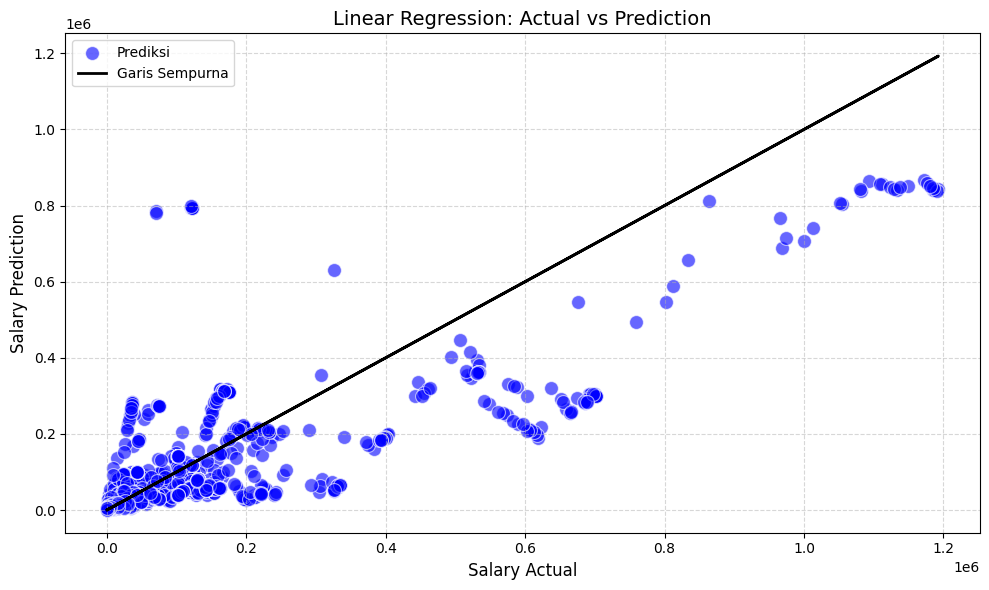

In [12]:
# Grafik menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, s=100, label='Prediksi')
plt.plot(y_test, y_test, color='black', linewidth=2, label='Garis Sempurna')
plt.xlabel('Salary Actual', fontsize=12)
plt.ylabel('Salary Prediction', fontsize=12)
plt.title('Linear Regression: Actual vs Prediction', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [13]:
# Membuat data baru terkait COVID-19

new_covid_data = pd.DataFrame({
    'Country': ['Afghanistan', 'Indonesia', 'Brazil', 'India', 'Italy', 'South Africa'],
    'Cumulative_cases': [5000, 500000, 1000000, 1500000, 2000000, 2500000],
    'New_deaths': [50, 100, 200, 300, 400, 500]
})

# Menggunakan label_encoder untuk mengubah 'Country' menjadi nilai numerik
country_encoded = label_encoder.transform(new_covid_data['Country'])

# Membuat X_new tanpa menyimpan 'Country_encoded' di new_covid_data
X_new = pd.DataFrame({
    'Country_encoded': country_encoded,
    'Cumulative_cases': new_covid_data['Cumulative_cases'],
    'New_deaths': new_covid_data['New_deaths']
})

predictions = model.predict(X_new)
new_covid_data['Cumulative Deaths'] = np.round(predictions).astype(int)
new_covid_data

,Country,Cumulative_cases,New_deaths,Cumulative Deaths
0,Afghanistan,5000,50,1315
1,Indonesia,500000,100,8718
2,Brazil,1000000,200,12304
3,India,1500000,300,19698
4,Italy,2000000,400,25564
5,South Africa,2500000,500,33653
